In [47]:
import pandas as pd

### Importation des datasets
Les differents jeux de donnees ont ete genere avec D-ITG pendant environ 1h pour chaque type

In [48]:
ping_df = pd.read_csv('PING_training_data.csv', delimiter='\t')
voice_df = pd.read_csv('VOICE_training_data.csv', delimiter='\t')
quake3_df = pd.read_csv('QUAKE3_training_data.csv', delimiter='\t')
dns_df = pd.read_csv('DNS_training_data.csv', delimiter='\t')
csi_df = pd.read_csv('CSI_training_data.csv', delimiter='\t')
csa_df = pd.read_csv('CSA_training_data.csv', delimiter='\t')
telnet_df = pd.read_csv('TELNET_training_data.csv', delimiter='\t')
dataset = pd.concat([ping_df[3000:45940], voice_df, quake3_df, dns_df, telnet_df, csa_df, csi_df], ignore_index=True)

In [49]:
dataset.shape

(300713, 17)

Notre jeu de donnees contient 300713 entrees sur 16 caracteristiques

In [50]:
dataset.head()

,Forward Packets,Forward Bytes,Delta Forward Packets,Delta Forward Bytes,Forward Instantaneous Packets per Second,Forward Average Packets per second,Forward Instantaneous Bytes per Second,Forward Average Bytes per second,Reverse Packets,Reverse Bytes,Delta Reverse Packets,Delta Reverse Bytes,DeltaReverse Instantaneous Packets per Second,Reverse Average Packets per second,Reverse Instantaneous Bytes per Second,Reverse Average Bytes per second,Traffic Type
0,15,1470,0,0,0.0,15.0,0.0,1470.0,15,1470,0,0,0.0,15.0,0.0,1470.0,PING
1,15,1470,0,0,0.0,15.0,0.0,1470.0,15,1470,0,0,0.0,15.0,0.0,1470.0,PING
2,15,1470,0,0,0.0,15.0,0.0,1470.0,15,1470,15,1470,0.0,0.0,0.0,0.0,PING
3,15,1470,0,0,0.0,15.0,0.0,1470.0,15,1470,15,1470,0.0,0.0,0.0,0.0,PING
4,15,1470,0,0,0.0,0.0,0.0,0.0,15,1470,15,1470,0.0,0.0,0.0,0.0,PING


Ici nous listons les 16 differents caracteristiques de flux que nous etudions

In [51]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300713 entries, 0 to 300712
Data columns (total 17 columns):
 #   Column                                         Non-Null Count   Dtype  
---  ------                                         --------------   -----  
 0   Forward Packets                                300713 non-null  int64  
 1   Forward Bytes                                  300713 non-null  int64  
 2   Delta Forward Packets                          300713 non-null  int64  
 3   Delta Forward Bytes                            300713 non-null  int64  
 4   Forward Instantaneous Packets per Second       300713 non-null  float64
 5   Forward Average Packets per second             300713 non-null  float64
 6   Forward Instantaneous Bytes per Second         300713 non-null  float64
 7   Forward Average Bytes per second               300713 non-null  float64
 8   Reverse Packets                                300713 non-null  int64  
 9   Reverse Bytes                        

On verifie qu'il n'y a pas de valeurs nulles

In [52]:
dataset.isnull().sum()

Forward Packets                                  0
Forward Bytes                                    0
Delta Forward Packets                            0
Delta Forward Bytes                              0
Forward Instantaneous Packets per Second         0
Forward Average Packets per second               0
Forward Instantaneous Bytes per Second           0
Forward Average Bytes per second                 0
Reverse Packets                                  0
Reverse Bytes                                    0
Delta Reverse Packets                            0
Delta Reverse Bytes                              0
DeltaReverse Instantaneous Packets per Second    0
Reverse Average Packets per second               0
Reverse Instantaneous Bytes per Second           0
Reverse Average Bytes per second                 0
Traffic Type                                     0
dtype: int64

In [53]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Forward Packets,300713.0,6.105322e+04,1.187211e+05,0.0,35.000000,112.0,7.710000e+04,721304.0
Forward Bytes,300713.0,6.202839e+06,1.274838e+07,0.0,2334.000000,7741.0,6.426502e+06,76208536.0
Delta Forward Packets,300713.0,2.360913e+01,4.332659e+01,0.0,0.000000,0.0,2.400000e+01,232.0
Delta Forward Bytes,300713.0,2.375057e+03,4.339721e+03,0.0,0.000000,0.0,1.995000e+03,23585.0
Forward Instantaneous Packets per Second,300713.0,2.352861e+01,4.325608e+01,0.0,0.000000,0.0,2.400000e+01,232.0
Forward Average Packets per second,300713.0,2.322367e+01,3.665856e+01,0.0,0.022001,3.4,3.864244e+01,1348.0
Forward Instantaneous Bytes per Second,300713.0,2.366523e+03,4.330966e+03,0.0,0.000000,0.0,1.994000e+03,23585.0
Forward Average Bytes per second,300713.0,2.361892e+03,3.978187e+03,0.0,1.469241,333.2,2.942921e+03,141971.0
Reverse Packets,300713.0,6.104717e+04,1.187144e+05,0.0,35.000000,112.0,7.710600e+04,721304.0
Reverse Bytes,300713.0,6.202185e+06,1.274757e+07,0.0,2334.000000,7741.0,6.426502e+06,76208536.0


On verifie le nombre d'entree par type

In [54]:
dataset['Traffic Type'].value_counts()

CSA       43009
DNS       42994
QUAKE3    42990
PING      42940
TELNET    42940
VOICE     42939
CSI       42901
Name: Traffic Type, dtype: int64

On remarque qu'il n'y a pas un grand ecart entre les nombres par types. Cela va eviter que notre modele soit biaise a cause d'un trop grand ecart

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

On visualise la matrice de correlation entre les differents caracteristiques

<AxesSubplot:>

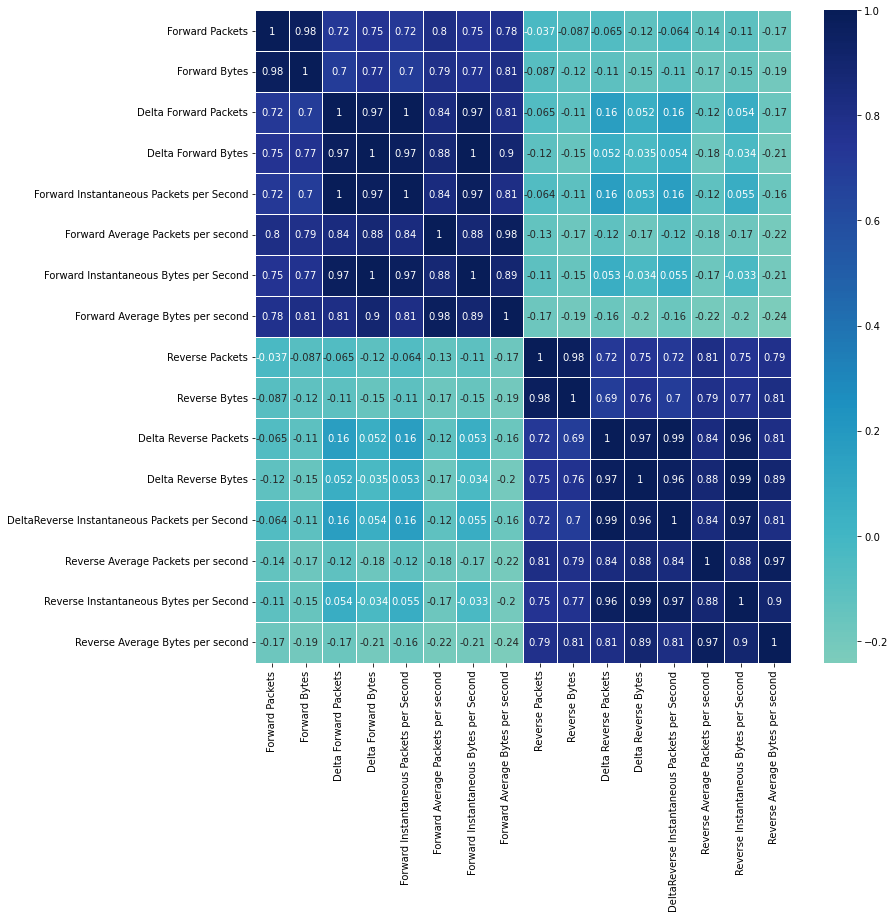

In [56]:
plt.figure(figsize=(12,12))
sns.heatmap(dataset.corr(),annot=True,lw=.5,center=0,cmap="YlGnBu")

On remarque que les caracteristiques "Forward" sont plus correles entre eux et les caracteristiques "Reverse" aussi

In [57]:
import numpy as np

ON visualise les histogrammes des differents caracteristiques seulement

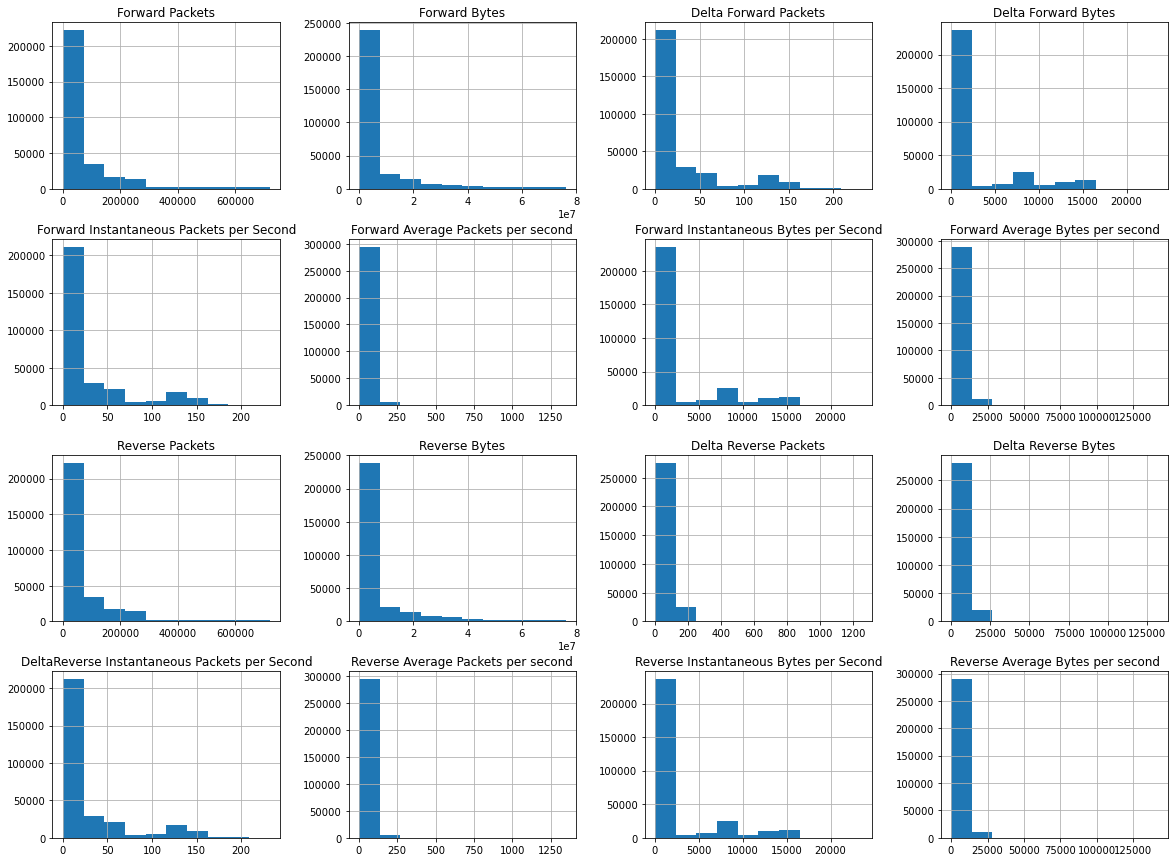

In [58]:
dataset.hist(figsize=(20,15))
plt.show()

In [59]:
dataset['Traffic Type']=dataset['Traffic Type'].map({'TELNET': 0, 'QUAKE3':1, 'PING':2, 'VOICE':3, 'CSI':4, 'CSA':5, 'DNS':6})

Ici, on visualise les correlations entre es caracteristiques et le type de traffic

Text(0.5, 0, 'Value')

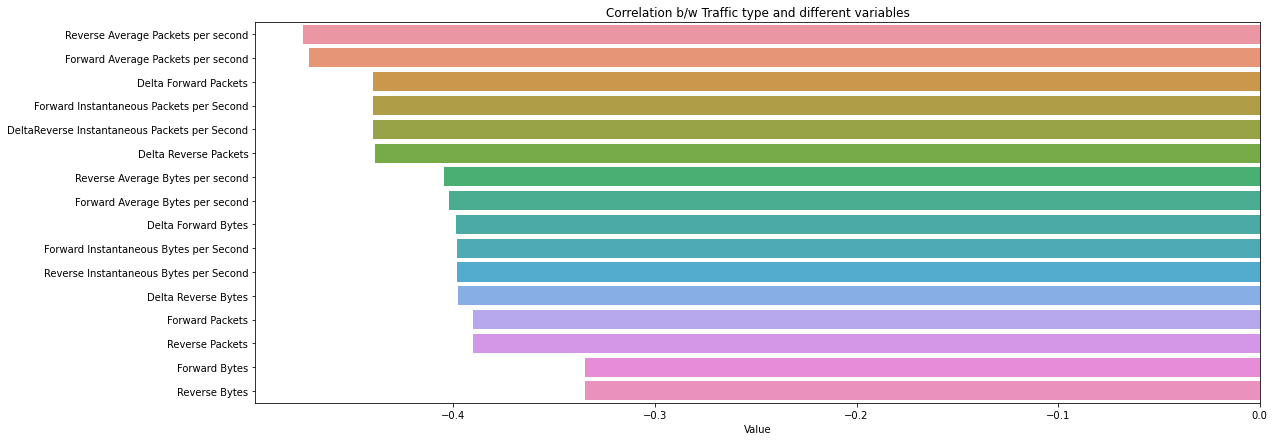

In [60]:
d_corr=dataset.corr()['Traffic Type'][:].drop('Traffic Type',axis=0)

plt.figure(figsize=(18,7))
plt.title('Correlation b/w Traffic type and different variables')
sns.barplot(y=d_corr.sort_values().index,x=d_corr.sort_values().values)
plt.xlabel('Value')

On remarque que les correlations tournent autour de 0,4 en valeur absolue

In [61]:
# dataset['Traffic Type']=dataset['Traffic Type'].map({0:'TELNET', 1:'QUAKE3', 2:'PING', 3:'VOICE', 4:'CSI', 5:'CSA', 6:'DNS'})

### Preparation des donnees
On separe les caracteristiques des classes

In [62]:
X_full= dataset.drop('Traffic Type', axis=1)
y_full = dataset['Traffic Type']

In [63]:
# from sklearn import preprocessing

#x = df.values #returns a numpy array
# min_max_scaler_full = preprocessing.MinMaxScaler()
# X_full = min_max_scaler_full.fit_transform(X_full)
# X_full = pd.DataFrame(X_full)

# min_max_scaler_cut = preprocessing.MinMaxScaler()
# X_cut = min_max_scaler_cut.fit_transform(X_cut)
# X_cut = pd.DataFrame(X_cut)

In [64]:
from sklearn.model_selection import train_test_split

Ici on divise nos donnees en ceux de test et ceux d'entrainement avec un ratio de 70% pour l'entrainement et la separation est randomise

In [65]:
X_train_full,X_test_full,y_train_full,y_test_full = train_test_split(X_full, y_full, stratify=y_full, test_size=0.3, random_state=18)

On entraine notre modele de regression logistique

In [66]:
from sklearn.linear_model import LogisticRegression

In [67]:
model_full = LogisticRegression(max_iter=100, penalty='l2', solver='lbfgs', 
                           class_weight='balanced', random_state=10)

In [68]:
model_full.fit(X_train_full,y_train_full)

c:\Users\bachi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced', random_state=10)

In [69]:
predictions_full = model_full.predict(X_test_full)

In [70]:
from sklearn.metrics import accuracy_score

In [71]:
print('Accuracy full: %.2f%%' % (accuracy_score(y_test_full, predictions_full)*100))

Accuracy full: 55.11%


Le score de notre modele de regression logistique n'est que de ~55%

On entraine notre modele d'arbre decisionnele

In [72]:
from sklearn.tree import DecisionTreeClassifier

In [73]:
model = DecisionTreeClassifier()

model.fit(X_train_full,y_train_full)

predictions = model.predict(X_test_full)


print('Accuracy full: %.2f%%' % (accuracy_score(y_test_full, predictions)*100))

Accuracy full: 99.99%


Nous constatons que le score de l'arbre decisionnelle est de 99%. C'est bien mais cela peut cacher un probleme d'overfitting

ON entraine notre modele de RandomForest

In [74]:
from sklearn.ensemble import RandomForestClassifier    

In [75]:
model_rf = RandomForestClassifier()

model_rf.fit(X_train_full,y_train_full)

predictions_rf = model_rf.predict(X_test_full)


print('Accuracy full: %.2f%%' % (accuracy_score(y_test_full, predictions_rf)*100))

Accuracy full: 99.99%


Nous constatons que le score de RandomForest est de 99%. C'est bien mais cela peut cacher un probleme d'overfitting

### Matrices de confusion 
On visualise les matrices de confusion de nos 3 premiers modeles 

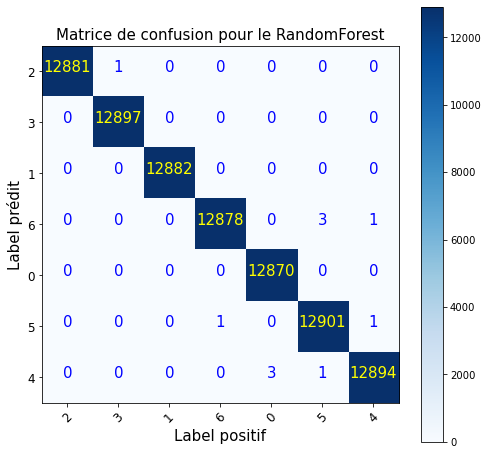

In [76]:
from sklearn.metrics import confusion_matrix


rf_cm = confusion_matrix(y_test_full,predictions_rf)

plt.figure(figsize=(8,8))
plt.imshow(rf_cm,interpolation='nearest',cmap=plt.cm.Blues)
plt.title('Matrice de confusion pour le RandomForest',fontsize=15)
plt.colorbar()
tick_marks = np.arange(len(y_full.unique()))
plt.xticks(tick_marks,y_full.unique(),rotation=45,fontsize=12)
plt.yticks(tick_marks,y_full.unique(),fontsize=12)
plt.xlabel('Label positif', fontsize=15)
plt.ylabel('Label prédit', fontsize=15)

for i in range(len(rf_cm)):
    for j in range(len(rf_cm[i])):
        color= 'blue'
        if rf_cm[i][j] > 5:
            color = 'yellow'
        plt.text(j,i, format(rf_cm[i][j]),
                 horizontalalignment= 'center',
                 color = color,fontsize=15
                )    


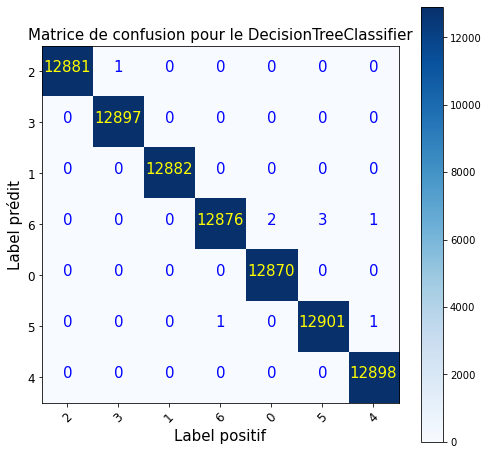

In [77]:
from sklearn.metrics import confusion_matrix


dt_cm = confusion_matrix(y_test_full,predictions)

plt.figure(figsize=(8,8))
plt.imshow(dt_cm,interpolation='nearest',cmap=plt.cm.Blues)
plt.title('Matrice de confusion pour le DecisionTreeClassifier',fontsize=15)
plt.colorbar()
tick_marks = np.arange(len(y_full.unique()))
plt.xticks(tick_marks,y_full.unique(),rotation=45,fontsize=12)
plt.yticks(tick_marks,y_full.unique(),fontsize=12)
plt.xlabel('Label positif', fontsize=15)
plt.ylabel('Label prédit', fontsize=15)

for i in range(len(dt_cm)):
    for j in range(len(dt_cm[i])):
        color= 'blue'
        if dt_cm[i][j] > 5:
            color = 'yellow'
        plt.text(j,i, format(dt_cm[i][j]),
                 horizontalalignment= 'center',
                 color = color,fontsize=15
                )    


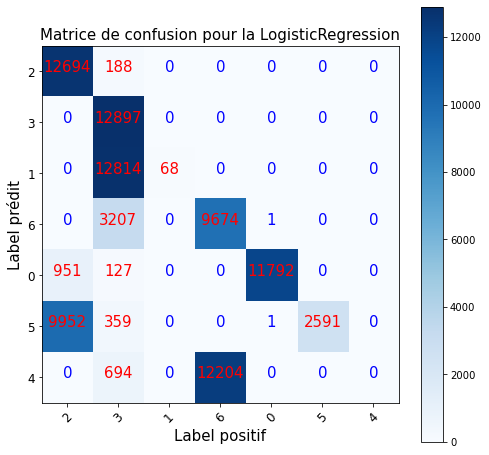

In [78]:
from sklearn.metrics import confusion_matrix


lr_cm = confusion_matrix(y_test_full,predictions_full)

plt.figure(figsize=(8,8))
plt.imshow(lr_cm,interpolation='nearest',cmap=plt.cm.Blues)
plt.title('Matrice de confusion pour la LogisticRegression',fontsize=15)
plt.colorbar()
tick_marks = np.arange(len(y_full.unique()))
plt.xticks(tick_marks,y_full.unique(),rotation=45,fontsize=12)
plt.yticks(tick_marks,y_full.unique(),fontsize=12)
plt.xlabel('Label positif', fontsize=15)
plt.ylabel('Label prédit', fontsize=15)

for i in range(len(lr_cm)):
    for j in range(len(lr_cm[i])):
        color= 'blue'
        if lr_cm[i][j] > 5:
            color = 'red'
        plt.text(j,i, format(lr_cm[i][j]),
                 horizontalalignment= 'center',
                 color = color,fontsize=15
                )    


ON remarque beaucoup de faux-positifs et faux-negatifs pour la regression. Les arbres de decision et le RandomForest ne se trompent pas beaucoup

On entraine notre modele de l'algorithme naif de BAyes GaussianNB

In [79]:
from sklearn.naive_bayes import GaussianNB

model_nb = GaussianNB()

model_nb.fit(X_train_full,y_train_full)

predictions_nb = model_nb.predict(X_test_full)


print('Accuracy full: %.2f%%' % (accuracy_score(y_test_full, predictions_nb)*100))

Accuracy full: 83.63%


L'algorithme GaussianNB a un score relativement bon de ~84%

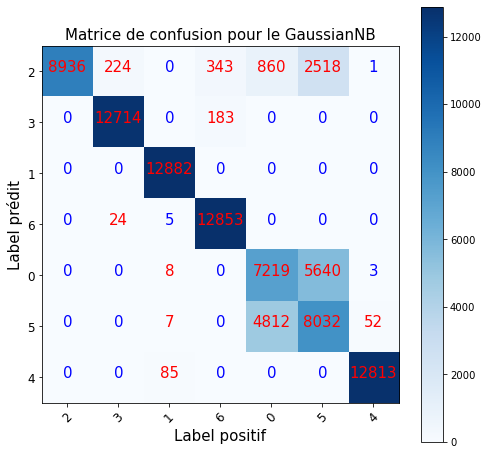

In [80]:
nb_cm = confusion_matrix(y_test_full,predictions_nb)

plt.figure(figsize=(8,8))
plt.imshow(nb_cm,interpolation='nearest',cmap=plt.cm.Blues)
plt.title('Matrice de confusion pour le GaussianNB',fontsize=15)
plt.colorbar()
tick_marks = np.arange(len(y_full.unique()))
plt.xticks(tick_marks,y_full.unique(),rotation=45,fontsize=12)
plt.yticks(tick_marks,y_full.unique(),fontsize=12)
plt.xlabel('Label positif', fontsize=15)
plt.ylabel('Label prédit', fontsize=15)

for i in range(len(nb_cm)):
    for j in range(len(nb_cm[i])):
        color= 'blue'
        if nb_cm[i][j] > 5:
            color = 'red'
        plt.text(j,i, format(nb_cm[i][j]),
                 horizontalalignment= 'center',
                 color = color,fontsize=15
                )    


La matrice de confusion du GaussianNB nous montre quelques faux-positifs et faux-negatis

On entraine notre modele de Deep Learning MLPClassifier avec 15 hidden layers

In [81]:
from sklearn.neural_network import MLPClassifier

model_mlp = MLPClassifier(solver='adam', alpha=1e-5,hidden_layer_sizes=(15,), random_state=8)

model_mlp.fit(X_train_full,y_train_full)

predictions_mlp = model_mlp.predict(X_test_full)

print('Accuracy full: %.2f%%' % (accuracy_score(y_test_full, predictions_mlp)*100))

Accuracy full: 99.90%


Le score est excellent avec ~99%

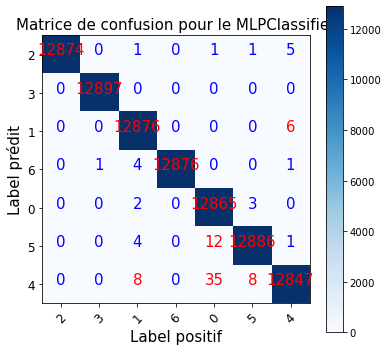

In [82]:
mlp_cm = confusion_matrix(y_test_full,predictions_mlp)

plt.figure(figsize=(6,6))
plt.imshow(mlp_cm,interpolation='nearest',cmap=plt.cm.Blues)
plt.title('Matrice de confusion pour le MLPClassifier',fontsize=15)
plt.colorbar()
tick_marks = np.arange(len(y_full.unique()))
plt.xticks(tick_marks,y_full.unique(),rotation=45,fontsize=12)
plt.yticks(tick_marks,y_full.unique(),fontsize=12)
plt.xlabel('Label positif', fontsize=15)
plt.ylabel('Label prédit', fontsize=15)

for i in range(len(mlp_cm)):
    for j in range(len(mlp_cm[i])):
        color= 'blue'
        if mlp_cm[i][j] > 5:
            color = 'red'
        plt.text(j,i, format(mlp_cm[i][j]),
                 horizontalalignment= 'center',
                 color = color,fontsize=15
                )    

La matrice de confusion nous montre un nombre negligeable de faux-positifs et de faux-negatifs

On entraine notre modele de Deep Learning MLPClassifier avec 20 hidden layers

In [83]:
model_mlp20 = MLPClassifier(solver='adam', alpha=1e-5,hidden_layer_sizes=(20,), random_state=8)

model_mlp20.fit(X_train_full,y_train_full)

predictions_mlp20 = model_mlp20.predict(X_test_full)

print('Accuracy full: %.2f%%' % (accuracy_score(y_test_full, predictions_mlp20)*100))

Accuracy full: 99.77%


Le score est excellent avec ~99%

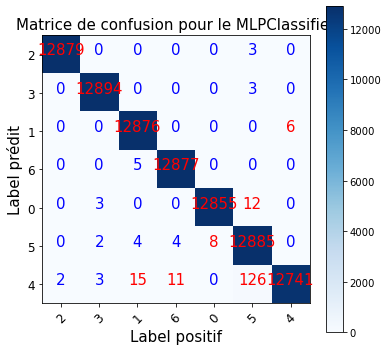

In [84]:
mlp20_cm = confusion_matrix(y_test_full,predictions_mlp20)

plt.figure(figsize=(6,6))
plt.imshow(mlp20_cm,interpolation='nearest',cmap=plt.cm.Blues)
plt.title('Matrice de confusion pour le MLPClassifier',fontsize=15)
plt.colorbar()
tick_marks = np.arange(len(y_full.unique()))
plt.xticks(tick_marks,y_full.unique(),rotation=45,fontsize=12)
plt.yticks(tick_marks,y_full.unique(),fontsize=12)
plt.xlabel('Label positif', fontsize=15)
plt.ylabel('Label prédit', fontsize=15)

for i in range(len(mlp20_cm)):
    for j in range(len(mlp20_cm[i])):
        color= 'blue'
        if mlp20_cm[i][j] > 5:
            color = 'red'
        plt.text(j,i, format(mlp20_cm[i][j]),
                 horizontalalignment= 'center',
                 color = color,fontsize=15
                )    

On remarque avec 20 hidden layers, il y'a mins de faux-positifs et faux-negatifs

On entraine notre modele de Deep Learning MLPClassifier avec 50 hidden layers

In [85]:
model_mlp50 = MLPClassifier(solver='adam', alpha=1e-5,hidden_layer_sizes=(50,), random_state=8)

model_mlp50.fit(X_train_full,y_train_full)

predictions_mlp50 = model_mlp50.predict(X_test_full)

print('Accuracy full: %.2f%%' % (accuracy_score(y_test_full, predictions_mlp50)*100))

Accuracy full: 99.93%


Le score est excellent avec ~99%

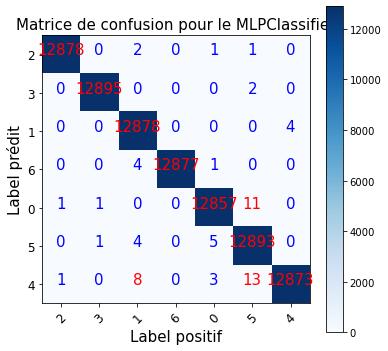

In [86]:
mlp50_cm = confusion_matrix(y_test_full,predictions_mlp50)

plt.figure(figsize=(6,6))
plt.imshow(mlp50_cm,interpolation='nearest',cmap=plt.cm.Blues)
plt.title('Matrice de confusion pour le MLPClassifier',fontsize=15)
plt.colorbar()
tick_marks = np.arange(len(y_full.unique()))
plt.xticks(tick_marks,y_full.unique(),rotation=45,fontsize=12)
plt.yticks(tick_marks,y_full.unique(),fontsize=12)
plt.xlabel('Label positif', fontsize=15)
plt.ylabel('Label prédit', fontsize=15)

for i in range(len(mlp50_cm)):
    for j in range(len(mlp50_cm[i])):
        color= 'blue'
        if mlp50_cm[i][j] > 5:
            color = 'red'
        plt.text(j,i, format(mlp50_cm[i][j]),
                 horizontalalignment= 'center',
                 color = color,fontsize=15
                )    

En augmentant le nombre de hidden layers a 50, la qualite du modele est moins bonne qu'avec 20 hidden layers

On genere des fichiers binaires pour chaque modele afin de les utiliser ailleurs

In [87]:
import pickle
print(pickle.format_version)
pickle.dump(model_full,open('logistic_regression_binary', 'wb'))
pickle.dump(model,open('decision_tree_classifier_binary', 'wb'))
pickle.dump(model_rf,open('random_forest_classifier_binary', 'wb'))
pickle.dump(model_nb,open('gaussianNB_classifier_binary', 'wb'))
pickle.dump(model_mlp,open('mlp_15_classifier_binary', 'wb'))
pickle.dump(model_mlp20,open('mlp_20_classifier_binary', 'wb'))
pickle.dump(model_mlp50,open('mlp_50_classifier_binary', 'wb'))

In [88]:
from sklearn.metrics import accuracy_score, mean_squared_error, f1_score, recall_score

# Evaluate the model
y_pred = model_full.predict(X_test_full)
accuracy = accuracy_score(y_test_full, y_pred)
mse = mean_squared_error(y_test_full, y_pred)
f1 = f1_score(y_test_full, y_pred, average='weighted')
recall = recall_score(y_test_full, y_pred, average='weighted')

# Print the metrics
print("Accuracy:", accuracy)
print("MSE:", mse)
print("F1 score:", f1)
print("Recall:", recall)

Accuracy: 0.551089631321081
MSE: 4.699060012858315
F1 score: 0.4500022008943018
Recall: 0.551089631321081


In [89]:
y_pred = model.predict(X_test_full)
accuracy = accuracy_score(y_test_full, y_pred)
mse = mean_squared_error(y_test_full, y_pred)
f1 = f1_score(y_test_full, y_pred, average='weighted')
recall = recall_score(y_test_full, y_pred, average='weighted')

# Print the metrics
print("Accuracy:", accuracy)
print("MSE:", mse)
print("F1 score:", f1)
print("Recall:", recall)

Accuracy: 0.9999002372137362
MSE: 0.0003214578668499346
F1 score: 0.9999002324771554
Recall: 0.9999002372137362


In [90]:
y_pred = model_rf.predict(X_test_full)
accuracy = accuracy_score(y_test_full, y_pred)
mse = mean_squared_error(y_test_full, y_pred)
f1 = f1_score(y_test_full, y_pred, average='weighted')
recall = recall_score(y_test_full, y_pred, average='weighted')

# Print the metrics
print("Accuracy:", accuracy)
print("MSE:", mse)
print("F1 score:", f1)
print("Recall:", recall)

Accuracy: 0.9998780677056777
MSE: 0.0004433901611723236
F1 score: 0.9998780664144897
Recall: 0.9998780677056777


In [91]:
y_pred = model_nb.predict(X_test_full)
accuracy = accuracy_score(y_test_full, y_pred)
mse = mean_squared_error(y_test_full, y_pred)
f1 = f1_score(y_test_full, y_pred, average='weighted')
recall = recall_score(y_test_full, y_pred, average='weighted')

# Print the metrics
print("Accuracy:", accuracy)
print("MSE:", mse)
print("F1 score:", f1)
print("Recall:", recall)

Accuracy: 0.8363336067572661
MSE: 1.0293413439155785
F1 score: 0.8406536731291409
Recall: 0.8363336067572661


In [92]:
y_pred = model_mlp.predict(X_test_full)
accuracy = accuracy_score(y_test_full, y_pred)
mse = mean_squared_error(y_test_full, y_pred)
f1 = f1_score(y_test_full, y_pred, average='weighted')
recall = recall_score(y_test_full, y_pred, average='weighted')

# Print the metrics
print("Accuracy:", accuracy)
print("MSE:", mse)
print("F1 score:", f1)
print("Recall:", recall)

Accuracy: 0.9989691178752743
MSE: 0.007471124215753653
F1 score: 0.9989691019065474
Recall: 0.9989691178752743


In [93]:
y_pred = model_mlp20.predict(X_test_full)
accuracy = accuracy_score(y_test_full, y_pred)
mse = mean_squared_error(y_test_full, y_pred)
f1 = f1_score(y_test_full, y_pred, average='weighted')
recall = recall_score(y_test_full, y_pred, average='weighted')

# Print the metrics
print("Accuracy:", accuracy)
print("MSE:", mse)
print("F1 score:", f1)
print("Recall:", recall)

Accuracy: 0.9977054559159332
MSE: 0.010718957146340923
F1 score: 0.9977046343316011
Recall: 0.9977054559159332


In [94]:
y_pred = model_mlp50.predict(X_test_full)
accuracy = accuracy_score(y_test_full, y_pred)
mse = mean_squared_error(y_test_full, y_pred)
f1 = f1_score(y_test_full, y_pred, average='weighted')
recall = recall_score(y_test_full, y_pred, average='weighted')

# Print the metrics
print("Accuracy:", accuracy)
print("MSE:", mse)
print("F1 score:", f1)
print("Recall:", recall)

Accuracy: 0.9993016604961535
MSE: 0.004788613740661095
F1 score: 0.9993017079469655
Recall: 0.9993016604961535


In [100]:
# import pickle

# model_ada = pickle.load(open("adaboost_classifier_binary", 'rb'))
# # model_xgb = pickle.load(open("xgboost_classifier_binary", 'rb'))
# # model_cat = pickle.load(open("catboost_classifier_binary", 'rb'))
# model_rnn5 = pickle.load(open("rnn_5ep_binary", 'rb'))
# model_rnn10 = pickle.load(open("rnn_10ep_binary", 'rb'))
# model_fnn5 = pickle.load(open("fnn_5ep__classifier_binary", 'rb'))
# model_fnn10 = pickle.load(open("fnn_10ep_binary", 'rb'))


ModuleNotFoundError: No module named 'keras'